In [1]:
#绘图字体和配色
# import os
# os.environ["MODIN_ENGINE"] = "ray"
# os.environ["MODIN_CPUS"] = "16"
# import modin.pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 16

class AcademicColors:
    """
    学术严谨风格配色方案
    基于Nature、Science等顶级科学期刊的设计理念
    """

    def __init__(self):
        # 主色板
        self.primary = '#333333'
        self.secondary = '#000000'
        self.background = '#F0F0F0'
        self.gridline = '#D9D9D9'

        # 分类色板（图表专用）
        self.categorical = [
            '#FF8C00',  # 明亮橙色 (保留)
            '#6A7FDB',  # 明亮靛蓝 (保留)
            '#2E8B7A',  # 深青 (保留)
            '#A0522D',  # 深红棕色 (替换金色)
            '#DA70D6',  # 明亮兰花紫 (保留)
            '#87CEEB',  # 天蓝色 (保留)
        ]

        # 发散色板
        self.diverging = [
            '#053061',  # 深蓝
            '#67A9CF',  # 浅蓝
            '#F7F7F7',  # 中性灰
            '#EF8A62',  # 浅红
            '#B2182B'   # 深红
        ]

        # 创建颜色映射
        self.categorical_cmap = ListedColormap(self.categorical)
        self.diverging_cmap = ListedColormap(self.diverging)

    def set_style(self):
        """设置matplotlib和seaborn的学术风格"""
        # 设置seaborn样式
        sns.set_style("whitegrid", {
            "axes.linewidth": 0.8,
            "grid.linewidth": 0.5,
            "grid.color": self.gridline,
            "axes.edgecolor": self.secondary,
            "axes.spines.left": True,
            "axes.spines.bottom": True,
            "axes.spines.top": False,
            "axes.spines.right": False,
        })

        # 设置matplotlib参数
        plt.rcParams.update({
            'font.size': 10,
            'axes.titlesize': 12,
            'axes.labelsize': 10,
            'xtick.labelsize': 9,
            'ytick.labelsize': 9,
            'legend.fontsize': 9,
            'figure.titlesize': 14,
            'axes.titlecolor': self.secondary,
            'axes.labelcolor': self.primary,
            'text.color': self.primary,
            'axes.edgecolor': self.secondary,
            'xtick.color': self.primary,
            'ytick.color': self.primary,
            'grid.alpha': 0.6,
            'axes.axisbelow': True
        })

        # 设置默认调色板
        sns.set_palette(self.categorical)

    def get_colors(self, n=None, palette_type='categorical'):
        """
        获取指定数量的颜色

        Parameters:
        -----------
        n : int, optional
            需要的颜色数量，如果为None则返回完整调色板
        palette_type : str
            调色板类型，'categorical' 或 'diverging'

        Returns:
        --------
        list : 颜色列表
        """
        if palette_type == 'categorical':
            colors = self.categorical
        elif palette_type == 'diverging':
            colors = self.diverging
        else:
            raise ValueError("palette_type must be 'categorical' or 'diverging'")

        if n is None:
            return colors
        elif n <= len(colors):
            return colors[:n]
        else:
            # 如果需要的颜色数量超过调色板，则循环使用
            return (colors * ((n // len(colors)) + 1))[:n]

    def _draw_palette_on_ax(self, colors, ax, title):
        """
        在指定的轴上绘制调色板
        这是palplot的替代方案，因为palplot不支持ax参数
        """
        n_colors = len(colors)
        ax.imshow(np.arange(n_colors).reshape(1, n_colors),
                  cmap=ListedColormap(colors),
                  interpolation="nearest",
                  aspect="auto")

        # 设置刻度和标签
        ax.set_xticks(np.arange(n_colors))
        ax.set_xticklabels([f'{i+1}' for i in range(n_colors)])
        ax.set_yticks([])
        ax.set_title(title, fontsize=12, color=self.secondary, pad=15)

        # 添加颜色值标签
        for i, color in enumerate(colors):
            ax.text(i, 0, color.upper(),
                   ha='center', va='center',
                   fontsize=8, color='white' if self._is_dark_color(color) else 'black',
                   weight='bold')

    def _is_dark_color(self, hex_color):
        """判断颜色是否为深色"""
        # 移除#号并转换为RGB
        hex_color = hex_color.lstrip('#')
        rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        # 计算亮度
        brightness = (rgb[0] * 299 + rgb[1] * 587 + rgb[2] * 114) / 1000
        return brightness < 128

    def show_palette(self, palette_type='all'):
        """
        展示调色板

        Parameters:
        -----------
        palette_type : str
            'categorical', 'diverging', 或 'all'
        """
        if palette_type == 'all':
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
            self._draw_palette_on_ax(self.categorical, ax1, '分类色板（Categorical Palette）')
            self._draw_palette_on_ax(self.diverging, ax2, '发散色板（Diverging Palette）')
        elif palette_type == 'categorical':
            fig, ax = plt.subplots(1, 1, figsize=(10, 3))
            self._draw_palette_on_ax(self.categorical, ax, '分类色板（Categorical Palette）')
        elif palette_type == 'diverging':
            fig, ax = plt.subplots(1, 1, figsize=(10, 3))
            self._draw_palette_on_ax(self.diverging, ax, '发散色板（Diverging Palette）')
        else:
            raise ValueError("palette_type must be 'categorical', 'diverging', or 'all'")

        plt.tight_layout()
        plt.show()

    def show_simple_palette(self, palette_type='all'):
        """
        使用seaborn的palplot展示调色板（简单版本，不支持自定义轴）
        """
        if palette_type in ['categorical', 'all']:
            print("分类色板（Categorical Palette）:")
            sns.palplot(self.categorical)
            plt.show()

        if palette_type in ['diverging', 'all']:
            print("发散色板（Diverging Palette）:")
            sns.palplot(self.diverging)
            plt.show()

    def demo_plots(self):
        """展示使用示例"""
        # 创建示例数据
        np.random.seed(42)
        categories = ['组别A', '组别B', '组别C', '组别D', '组别E']
        values = np.random.randint(10, 100, len(categories))

        # 创建子图
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle('学术严谨风格图表示例', fontsize=16, color=self.secondary, y=0.95)

        # 柱状图
        bars = ax1.bar(categories, values, color=self.get_colors(len(categories)))
        ax1.set_title('实验组数据对比', fontweight='bold')
        ax1.set_ylabel('测量值')
        ax1.grid(True, alpha=0.3)

        # 散点图
        x = np.random.normal(0, 1, 100)
        y = np.random.normal(0, 1, 100)
        groups = np.random.choice(categories[:3], 100)

        for i, group in enumerate(categories[:3]):
            mask = groups == group
            ax2.scatter(x[mask], y[mask],
                       color=self.categorical[i],
                       label=group, alpha=0.7, s=50)

        ax2.set_title('多组数据分布', fontweight='bold')
        ax2.set_xlabel('变量 X')
        ax2.set_ylabel('变量 Y')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 热力图数据
        data = np.random.randn(5, 5)
        im = ax3.imshow(data, cmap=self.diverging_cmap, aspect='auto')
        ax3.set_title('相关性矩阵热力图', fontweight='bold')
        ax3.set_xticks(range(5))
        ax3.set_yticks(range(5))
        ax3.set_xticklabels([f'特征{i+1}' for i in range(5)])
        ax3.set_yticklabels([f'特征{i+1}' for i in range(5)])

        # 添加颜色条
        cbar = plt.colorbar(im, ax=ax3, shrink=0.8)
        cbar.set_label('相关系数')

        # 线图
        x_line = np.linspace(0, 10, 50)
        for i in range(3):
            y_line = np.sin(x_line + i) + np.random.normal(0, 0.1, 50)
            ax4.plot(x_line, y_line,
                    color=self.categorical[i],
                    label=f'条件{i+1}',
                    linewidth=2)

        ax4.set_title('时间序列对比', fontweight='bold')
        ax4.set_xlabel('时间')
        ax4.set_ylabel('响应值')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# 创建全局颜色实例
academic_colors = AcademicColors()

# 便捷函数
def set_academic_style():
    """快速设置学术风格"""
    academic_colors.set_style()

def get_academic_colors(n=None, palette_type='categorical'):
    """快速获取学术配色"""
    return academic_colors.get_colors(n, palette_type)

def show_academic_palette(palette_type='all'):
    """快速展示调色板（修复版本）"""
    academic_colors.show_palette(palette_type)

def show_simple_palette(palette_type='all'):
    """使用seaborn原生palplot展示调色板"""
    academic_colors.show_simple_palette(palette_type)

# 使用示例
if __name__ == "__main__":
    print("学术严谨风格配色方案已加载！")
    print("\n使用方法：")
    print("1. set_academic_style() - 设置学术风格")
    print("2. get_academic_colors(n, 'categorical') - 获取分类颜色")
    print("3. get_academic_colors(n, 'diverging') - 获取发散颜色")
    print("4. show_academic_palette() - 展示所有调色板（修复版本）")
    print("5. show_simple_palette() - 展示调色板（简单版本）")
    print("6. academic_colors.demo_plots() - 查看使用示例")


学术严谨风格配色方案已加载！

使用方法：
1. set_academic_style() - 设置学术风格
2. get_academic_colors(n, 'categorical') - 获取分类颜色
3. get_academic_colors(n, 'diverging') - 获取发散颜色
4. show_academic_palette() - 展示所有调色板（修复版本）
5. show_simple_palette() - 展示调色板（简单版本）
6. academic_colors.demo_plots() - 查看使用示例


组合中的PB分布，以及不同分位数个股的表现
组合中ROEttm分布，以及不同分为数个股的表现

个股的收益分布

统计这一期残差排名最后一组的公司，在多少期之后离开最后一组，可以画出柱状图
统计残差排名最后一组的公司，下一期在什么组，回报率如何

In [9]:
# 从数据库导入数据dfpbroech4
import pandas as pd
from sqlalchemy import create_engine

# 根据你的实际数据库信息填写
username = "panjinhe"
password = "20020112p"
host = "localhost"
port = "5432"
database = "pbroe"

# 定义要查询的表和schema
table_name = 'pbroech4'
schema_name = 'pbroe'

# 定义日期范围
start_date = '2010-04'
end_date = '2025-03'

# 构建连接字符串
connection_string = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"

# 创建引擎
engine = create_engine(connection_string)

# 构建带有日期范围筛选的SQL查询语句
# 这样可以在数据库层面直接过滤，效率更高
sql_query = f"""
SELECT * FROM {schema_name}.{table_name}
WHERE "trdmnt" >= '{start_date}' AND "trdmnt" <= '{end_date}'
"""
# 使用 pd.read_sql_query 执行带有条件的查询
dfpbroech4 = pd.read_sql_query(sql_query, engine)

# print("\n数据加载成功！")
# # --- 3. 显示数据信息 ---
# print("\nDataFrame Info:")
print(dfpbroech4.info())
# print("\nDataFrame Head (first 10 rows):")
#display(dfpbroech4.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587254 entries, 0 to 587253
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   stkcd          587254 non-null  object 
 1   trdmnt         587254 non-null  object 
 2   accper         587254 non-null  object 
 3   shortname      587254 non-null  object 
 4   if_st          587254 non-null  int64  
 5   indcd1         587254 non-null  object 
 6   indnme1        587254 non-null  object 
 7   price          587254 non-null  float64
 8   market_cap     587254 non-null  float64
 9   total_shares   587254 non-null  float64
 10  eps_ttm_core   538473 non-null  float64
 11  eps_ttm_total  558759 non-null  float64
 12  roe_ttm        557861 non-null  float64
 13  total_equity   587254 non-null  float64
 14  ar             587254 non-null  float64
 15  inventory      587254 non-null  float64
 16  intangibles    587254 non-null  float64
 17  onaps          587254 non-nul

In [13]:
# 计算BadjPS
import pandas as pd
import statsmodels.api as sm
from tqdm import tqdm
import warnings
from pathlib import Path

# 忽略不必要的警告信息
warnings.filterwarnings('ignore')

def calculate_b_adj(df: pd.DataFrame) -> pd.DataFrame:
    """
    根据两阶段回归模型计算质量调整后净资产 (BadjPS)。

    第一阶段：按月、按行业运行价格模型回归，估计资产价值系数。
        Price = α + β1*ONAPS + β2*ARPS + β3*INVPS + β4*IAPS + β5*EPS_core + ε
    第二阶段：使用第一阶段的系数计算 Badj。
        BadjPS = ONAPS + (β2/β1)*ARPS + (β3/β1)*INVPS + (β4/β1)*IAPS

    Args:
        df (pd.DataFrame): 包含 pbroech4 视图所有数据的DataFrame。

    Returns:
        pd.DataFrame: 增加了回归系数和 Badj 相关列的DataFrame。
    """

    print("开始计算质量调整后净资产 (BadjPS)...")

    # --- 首先移除 eps_ttm_core 为空的样本 ---
    # 这是回归模型中的关键控制变量，如果缺失，则该行数据无法用于价格模型。
    print(f"原始数据行数: {len(df)}")
    df = df.dropna(subset=['eps_ttm_core']).copy()
    print(f"移除 'eps_ttm_core' 缺失值后行数: {len(df)}")

    # 确保'trdmnt'是字符串或时期类型，以便正确排序
    df['trdmnt'] = df['trdmnt'].astype(str)

    # 获取所有唯一的交易月份并排序
    all_months = sorted(df['trdmnt'].unique())

    # 用于存储每个月处理结果的列表
    results_by_month = []

    # 使用tqdm显示进度条
    for month in tqdm(all_months, desc="处理月份"):
        monthly_data = df[df['trdmnt'] == month].copy()

        # 定义回归模型中的变量
        independent_vars = ['onaps', 'arps', 'invps', 'iaps', 'eps_ttm_core']
        dependent_var = 'price'

        # 按行业分组进行回归
        def regression_by_industry(industry_group):
            # --- 数据准备 ---
            if industry_group.shape[0] < 10:
                return None # 数据太少，返回None以便后续过滤

            regression_sample = industry_group[[dependent_var] + independent_vars].dropna()

            if regression_sample.shape[0] < 10:
                return None # 删除空值后数据太少

            # --- 第一阶段：运行价格模型回归 ---
            Y = regression_sample[dependent_var]
            X = regression_sample[independent_vars]
            X = sm.add_constant(X)

            try:
                model = sm.OLS(Y, X).fit()

                beta1 = model.params.get('onaps', None)
                beta2 = model.params.get('arps', None)
                beta3 = model.params.get('invps', None)
                beta4 = model.params.get('iaps', None)

                industry_group['beta_onaps'] = beta1
                industry_group['beta_arps'] = beta2
                industry_group['beta_invps'] = beta3
                industry_group['beta_iaps'] = beta4

                # --- 第二阶段：计算 BadjPS ---
                if beta1 is not None and beta1 > 0:
                    vc_arps = beta2 / beta1
                    vc_invps = beta3 / beta1
                    vc_iaps = beta4 / beta1

                    industry_group['b_adj_ps'] = (
                        industry_group['onaps'] +
                        vc_arps * industry_group['arps'] +
                        vc_invps * industry_group['invps'] +
                        vc_iaps * industry_group['iaps']
                    )
                else:
                    industry_group['b_adj_ps'] = None

            except Exception as e:
                pass # 静默处理

            return industry_group

        # 对当月所有行业应用回归函数
        monthly_result_with_index = monthly_data.groupby('indcd1').apply(regression_by_industry)

        # 过滤掉那些因为数据不足而返回None的组
        monthly_result_with_index = monthly_result_with_index.dropna(how='all')

        if not monthly_result_with_index.empty:
            # 核心修正：'indcd1'是groupby的键，会成为结果的索引。
            # 但'indcd1'也作为列存在于结果中。
            # 为了避免后续reset_index()时因列名重复而出错，我们只把索引的第一层（即'indcd1'）丢弃。
            monthly_result_with_index = monthly_result_with_index.reset_index(level=0, drop=True)
            results_by_month.append(monthly_result_with_index)


    # 将所有月份的结果合并成一个DataFrame
    if not results_by_month:
        print("警告：没有任何月份成功计算出结果，返回一个空的DataFrame。")
        return pd.DataFrame()

    final_df = pd.concat(results_by_month)

    # 因为我们在循环内部已经处理了索引，所以这里不再需要 reset_index()

    print("BadjPS 计算完成。")
    return final_df

# --- 使用示例 ---
if __name__ == '__main__':
    # 运行计算函数
    df_with_badj = calculate_b_adj(dfpbroech4)

    # 显示结果
    print("\n计算结果预览:")
    # 筛选出包含计算结果的列以方便预览
    preview_cols = [
        'stkcd', 'trdmnt', 'indcd1', 'price',
        'beta_onaps', 'beta_arps', 'beta_invps', 'beta_iaps',
        'onaps', 'arps', 'invps', 'iaps', 'b_adj_ps'
    ]

    # 找到第一个成功计算出 Badj 的月份进行展示
    first_valid_month = df_with_badj.dropna(subset=['b_adj_ps'])['trdmnt'].min()
    if first_valid_month:
        print(f"--- 展示月份: {first_valid_month} ---")
        print(df_with_badj[df_with_badj['trdmnt'] == first_valid_month][preview_cols].dropna(subset=['b_adj_ps']).head())
    else:
        print("未能成功计算任何 Badj 值，请检查数据。")

    # --- 将最终结果保存到CSV文件 ---
    output_filename = 'pbroe4.1Badj.csv'
    df_with_badj.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"\n计算结果已成功保存到文件: {output_filename}")




开始计算质量调整后净资产 (BadjPS)...
原始数据行数: 587254
移除 'eps_ttm_core' 缺失值后行数: 538473


处理月份: 100%|██████████| 180/180 [01:09<00:00,  2.60it/s]


BadjPS 计算完成。

计算结果预览:
--- 展示月份: 2010-04 ---
         stkcd   trdmnt indcd1  price  beta_onaps  beta_arps  beta_invps  \
77430   000972  2010-04    A01  13.10    0.473612   5.389201   -1.043902   
77623   000998  2010-04    A01  22.73    0.473612   5.389201   -1.043902   
102956  600962  2010-04    A01  13.43    0.473612   5.389201   -1.043902   
223346  000860  2010-04    A01  17.36    0.473612   5.389201   -1.043902   
246129  600540  2010-04    A01  13.40    0.473612   5.389201   -1.043902   

        beta_iaps     onaps      arps     invps      iaps   b_adj_ps  
77430  -12.325299 -2.776698  1.269580  3.454284  0.348393  -5.010505  
77623  -12.325299  0.633936  0.341435  1.824549  0.449593 -11.202665  
102956 -12.325299  2.611225  0.471053  1.701500  0.203866  -1.084444  
223346 -12.325299 -0.834929  0.581070  5.359376  0.294577 -13.701815  
246129 -12.325299  2.265104  0.077161  1.213502  0.178644  -4.180649  

计算结果已成功保存到文件: pbroe4.1Badj.csv


文件 'pbroe4.1Badj.csv' 加载成功。

--- b_adj_ps 分布分析 ---
原始数据描述性统计量:
count    484363.000000
mean          7.474669
std         304.043275
min      -73544.386135
25%           2.302008
50%           4.053266
75%           6.950614
max      123138.698544

--- 对 b_adj_ps 进行缩尾处理 (Winsorization) ---
将数据缩尾至 1% (-4.62) 和 99% (39.64) 分位数之间。

缩尾后数据描述性统计量:
count    484363.000000
mean          5.692386
std           6.270345
min          -4.615190
25%           2.302008
50%           4.053266
75%           6.950614
max          39.641666

负值样本占比 (基于原始数据): 4.23%

正在绘制分布图...


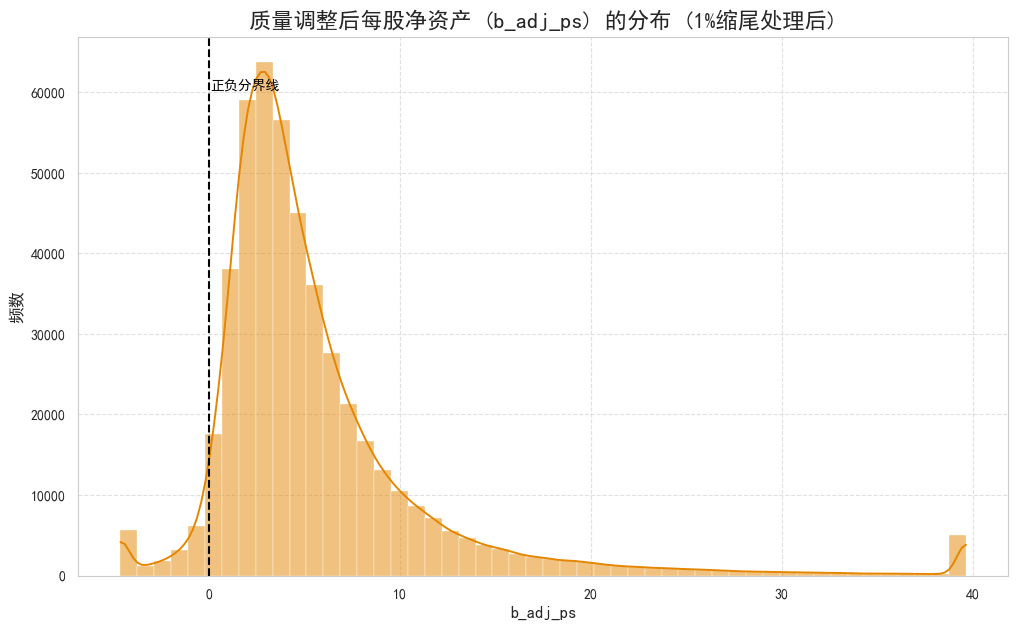

In [15]:
# Badj的分布
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def set_academic_style():
    """设置图表的学术风格"""
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.size'] = 18

set_academic_style()

# --- 1. 加载数据 ---
# 请确保 'pbroe4.1Badj.csv' 文件与您的Notebook在同一个目录下
# 否则，请提供完整的文件路径
try:
    results_df = pd.read_csv('pbroe4.1Badj.csv')
    print("文件 'pbroe4.1Badj.csv' 加载成功。")
except FileNotFoundError:
    print("错误：未找到文件 'pbroe4.1Badj.csv'。请确保文件路径正确。")
    # 如果文件不存在，创建一个模拟DataFrame以便代码可以运行
    results_df = pd.DataFrame({'b_adj_ps': np.random.randn(1000) * 5})


# --- 2. 分析 b_adj_ps 的分布 ---
print("\n--- b_adj_ps 分布分析 ---")

# 仅分析非空的 b_adj_ps 值
b_adj_ps_data = results_df['b_adj_ps'].dropna()

if b_adj_ps_data.empty:
    print("b_adj_ps 列中没有有效数据可供分析。")
else:
    # 2.1. 原始数据描述性统计
    print("原始数据描述性统计量:")
    # 使用 .to_string() 以获得更好的格式化输出
    print(b_adj_ps_data.describe().to_string())

    # --- 核心修正：对数据进行缩尾处理 (Winsorization) 以处理极端值 ---
    print("\n--- 对 b_adj_ps 进行缩尾处理 (Winsorization) ---")
    # 定义缩尾的上下分位数
    lower_quantile = 0.01
    upper_quantile = 0.99
    lower_bound = b_adj_ps_data.quantile(lower_quantile)
    upper_bound = b_adj_ps_data.quantile(upper_quantile)
    print(f"将数据缩尾至 {lower_quantile*100:.0f}% ({lower_bound:.2f}) 和 {upper_quantile*100:.0f}% ({upper_bound:.2f}) 分位数之间。")

    # 应用缩尾，生成一个新的Series用于分析和绘图
    b_adj_ps_winsorized = b_adj_ps_data.clip(lower_bound, upper_bound)

    # 2.2. 缩尾后数据描述性统计
    print("\n缩尾后数据描述性统计量:")
    print(b_adj_ps_winsorized.describe().to_string())

    # 2.3. 计算负值占比 (基于原始数据)
    negative_percentage = (b_adj_ps_data < 0).sum() / len(b_adj_ps_data) * 100
    print(f"\n负值样本占比 (基于原始数据): {negative_percentage:.2f}%")

    # 2.4. 绘制分布直方图 (使用缩尾后的数据)
    print("\n正在绘制分布图...")

    # 使用您喜欢的学术风格和配色
    plt.style.use('seaborn-v0_8-paper')
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文字体，防止乱码
    plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
    plot_color = '#E58601' # 橙色

    plt.figure(figsize=(12, 7))

    sns.histplot(b_adj_ps_winsorized, kde=True, color=plot_color, bins=50)

    plt.title('质量调整后每股净资产 (b_adj_ps) 的分布 (1%缩尾处理后)', fontsize=16, fontweight='bold')
    plt.xlabel('b_adj_ps', fontsize=12)
    plt.ylabel('频数', fontsize=12)

    # 在x=0处画一条垂直虚线，以清晰地分隔正负值
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)

    # 添加图例说明垂直线
    plt.text(0.1, plt.gca().get_ylim()[1] * 0.9, '正负分界线', color='black', fontsize=10)

    plt.grid(True, linestyle='--', alpha=0.6)

    # 优化刻度标签
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()


文件 'pbroe4.1Badj.csv' 加载成功，共 517650 条记录。
文件 'E:\PBROE\data\TRDNEW_Mnth.csv' 加载成功，共 887384 条收益率数据。
计算 P/Badj 完成，剔除 b_adj_ps <= 0 的样本后剩余 463879 条记录。
数据合并完成，共匹配到 463823 条有效记录。

--- 各投资组合平均月度收益率 ---
portfolio
1     0.011435
2     0.012487
3     0.012051
4     0.011271
5     0.012008
6     0.010713
7     0.010023
8     0.008368
9     0.006194
10    0.004265
Name: next_month_return, dtype: float64

正在绘制分组收益率柱状图...


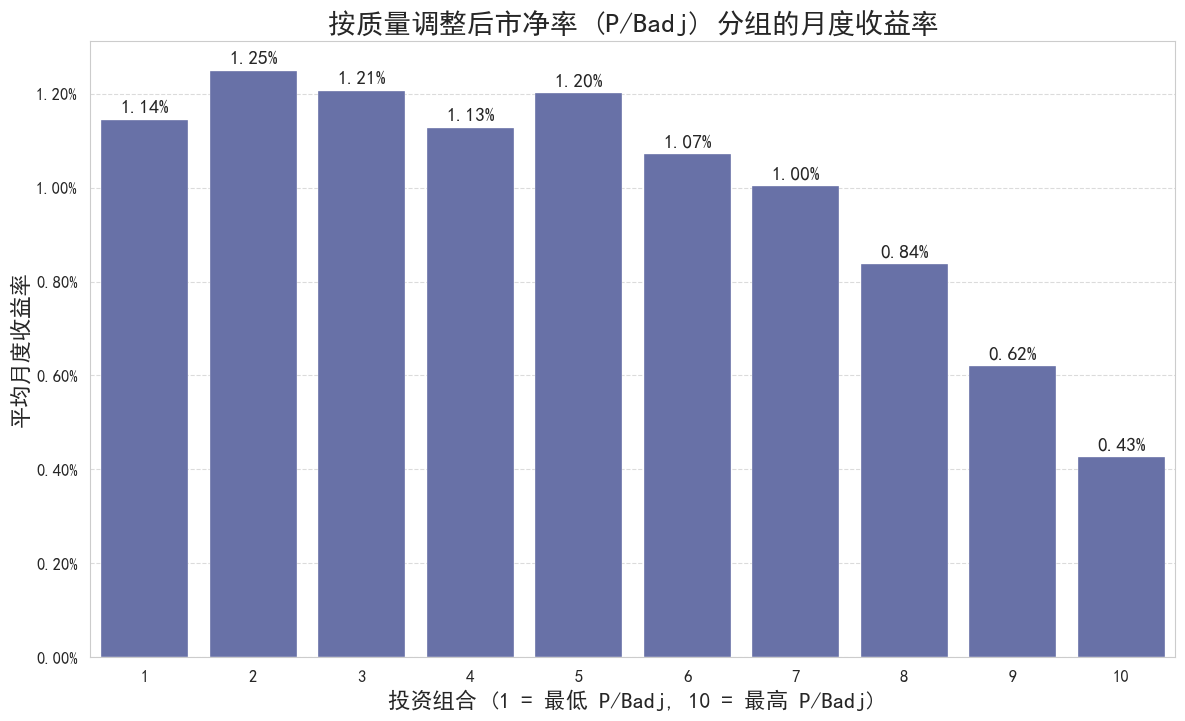

In [29]:
# P/Badj收益分组统计
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

def set_academic_style():
    """设置图表的学术风格"""
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.style.use('seaborn-v0_8-paper')
    plt.rcParams['font.size'] = 18

set_academic_style()

# --- 1. 加载数据 ---

# 定义文件路径
BADJ_FILE = Path('pbroe4.1Badj.csv')
# 请将下面的路径替换为您存放收益率文件的实际路径
RETURNS_FILE = Path('E:/PBROE/data/TRDNEW_Mnth.csv')

# 加载 Badj 数据
try:
    df_badj = pd.read_csv(BADJ_FILE)
    # --- 核心修正：确保 df_badj 中的 stkcd 也是补零的字符串类型 ---
    df_badj['stkcd'] = df_badj['stkcd'].astype(str).str.zfill(6)
    print(f"文件 '{BADJ_FILE}' 加载成功，共 {len(df_badj)} 条记录。")
except FileNotFoundError:
    print(f"错误：未找到文件 '{BADJ_FILE}'。请确保文件路径正确。")
    df_badj = pd.DataFrame()

# 加载收益率数据
try:
    # 将编码从 'gbk' 更改为 'utf-8-sig' 以正确处理BOM
    df_returns = pd.read_csv(RETURNS_FILE, usecols=['Stkcd', 'Trdmnt', 'Mretwd'], encoding='utf-8-sig')
    df_returns.rename(columns={'Stkcd': 'stkcd', 'Trdmnt': 'return_month', 'Mretwd': 'next_month_return'}, inplace=True)
    df_returns['stkcd'] = df_returns['stkcd'].astype(str).str.zfill(6)
    df_returns['return_month'] = pd.to_datetime(df_returns['return_month'], format='%Y-%m')
    df_returns['next_month_return'] = pd.to_numeric(df_returns['next_month_return'], errors='coerce')
    print(f"文件 '{RETURNS_FILE}' 加载成功，共 {len(df_returns)} 条收益率数据。")
except FileNotFoundError:
    print(f"错误：未找到文件 '{RETURNS_FILE}'。请确保文件路径正确。")
    df_returns = pd.DataFrame()
except UnicodeDecodeError:
    print(f"文件 '{RETURNS_FILE}' 使用 'utf-8-sig' 解码失败，请尝试其他编码如 'utf-8' 或 'gbk'。")
    df_returns = pd.DataFrame()


# --- 2. 数据预处理与合并 ---

if not df_badj.empty and not df_returns.empty:
    # 仅保留需要的列
    df_badj = df_badj[['stkcd', 'trdmnt', 'price', 'b_adj_ps']].copy()

    # --- 核心变更：计算 P/Badj 因子 ---
    # 为了让P/B指标有意义，分母 b_adj_ps 必须为正数
    df_badj = df_badj[df_badj['b_adj_ps'] > 0].copy()
    df_badj['pb_adj'] = df_badj['price'] / df_badj['b_adj_ps']
    print(f"计算 P/Badj 完成，剔除 b_adj_ps <= 0 的样本后剩余 {len(df_badj)} 条记录。")

    # 将因子数据的月份转换为datetime对象
    df_badj['trdmnt_dt'] = pd.to_datetime(df_badj['trdmnt'], format='%Y-%m')

    # 创建一个新列，代表我们想要预测其收益率的目标月份（即下个月）
    df_badj['target_return_month'] = df_badj['trdmnt_dt'] + pd.DateOffset(months=1)

    # 将因子数据与收益率数据合并
    # 合并的键是：股票代码 和 目标收益月份
    merged_df = pd.merge(
        df_badj,
        df_returns,
        left_on=['stkcd', 'target_return_month'],
        right_on=['stkcd', 'return_month']
    )
    print(f"数据合并完成，共匹配到 {len(merged_df)} 条有效记录。")

    # --- 3. 投资组合分析 ---

    # 剔除缺失值
    analysis_df = merged_df.dropna(subset=['pb_adj', 'next_month_return']).copy()

    # 在每个月，将股票按 pb_adj 分成10组
    # qcut 会根据分位数进行切割，每组样本量基本相等
    # duplicates='drop' 可以处理当很多股票因子值相同时的情况
    analysis_df['portfolio'] = analysis_df.groupby('trdmnt')['pb_adj'].transform(
        lambda x: pd.qcut(x, 10, labels=False, duplicates='drop')
    )

    # 将分组标签从 0-9 调整为 1-10，更符合直觉
    analysis_df['portfolio'] = analysis_df['portfolio'] + 1

    # 计算每个月每个投资组合的等权平均收益率
    monthly_portfolio_returns = analysis_df.groupby(['trdmnt', 'portfolio'])['next_month_return'].mean().reset_index()

    # --- 4. 计算并展示各组平均收益率 ---

    # 计算每个投资组合在整个时间跨度内的平均月度收益率
    average_returns = monthly_portfolio_returns.groupby('portfolio')['next_month_return'].mean()

    print("\n--- 各投资组合平均月度收益率 ---")
    print(average_returns)

    # --- 5. 可视化 ---

    print("\n正在绘制分组收益率柱状图...")

    plt.figure(figsize=(14, 8))

    # 使用您提供的学术配色
    bar_color = '#5D69B1' # 靛蓝

    ax = sns.barplot(x=average_returns.index, y=average_returns.values, color=bar_color)

    # 在每个柱子上显示数值
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=14)

    plt.title('按质量调整后市净率 (P/Badj) 分组的月度收益率', fontsize=20, fontweight='bold')
    plt.xlabel('投资组合 (1 = 最低 P/Badj, 10 = 最高 P/Badj)', fontsize=16)
    plt.ylabel('平均月度收益率', fontsize=16)

    # 将y轴格式化为百分比
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.2%}'.format))

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

else:
    print("数据加载失败，无法进行分析。")


In [45]:
# 计算残差 pb_adj大于0.5，1.46%
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pathlib import Path
from tqdm import tqdm

# =================================================================== #
#                           【1. 配置与加载】                         #
# =================================================================== #

# --- 输入/输出文件配置 ---
INPUT_FILE = Path('pbroe4.1Badj.csv')
OUTPUT_DIR = Path(r'E:\PBROE\ch4')
OUTPUT_FILENAME = 'pbroe4.1Residuals.csv'
OUTPUT_DIR.mkdir(parents=True, exist_ok=True) # 确保输出目录存在

# --- 加载数据 ---
try:
    df = pd.read_csv(INPUT_FILE)
    print(f"文件 '{INPUT_FILE}' 加载成功，共 {len(df)} 条记录。")
except FileNotFoundError:
    print(f"错误：未找到文件 '{INPUT_FILE}'。请确保文件路径正确。")
    df = pd.DataFrame()

# =================================================================== #
#                       【2. 数据清洗与预处理】                       #
# =================================================================== #
if not df.empty:
    print("\n--- 步骤 1: 数据清洗与预处理 ---")

    # 1. 计算 P/Badj 因子
    # 仅保留 b_adj_ps 为正数的样本，这是计算市净率的前提
    df = df[df['b_adj_ps'] > -0].copy()
    df['pb_adj'] = df['price'] / df['b_adj_ps']

    # 2. 【回归模型特定清洗】根据您的要求进行筛选
    # 剔除 P/Badj 小于等于0的样本 (因为需要取对数)
    df = df[df['pb_adj'] > 0.5]
    # 剔除 ROEttm 大于 0.5 的极端值
    df = df[df['roe_ttm'] <= 0.5]

    # 3. 剔除关键指标为空的记录
    df.dropna(subset=['roe_ttm', 'pb_adj', 'indnme1'], inplace=True)

    # 4. 计算 ln(P/Badj)
    df['ln_pb_adj'] = np.log(df['pb_adj'])

    print(f"数据清洗后，剩余 {len(df)} 条有效记录用于回归分析。")


    # =================================================================== #
    #              【3. 执行月度行业内回归与残差计算】                    #
    # =================================================================== #
    print("\n--- 步骤 2: 执行月度行业内回归与残差计算 ---")

    def calculate_residuals_adj(group):
        """
        对给定的分组（某行业某月份），执行 ln(P/Badj) ~ ROEttm 回归并计算标准化残差。
        """
        # 行业内样本数过少，无法进行有意义的回归
        if len(group) < 10:
            group['residual_zscore_adj'] = np.nan
            return group

        try:
            # 准备回归的Y和X
            y = group['ln_pb_adj']
            X = sm.add_constant(group['roe_ttm']) # 添加常数项

            # 执行OLS回归
            model = sm.OLS(y, X, missing='drop').fit()

            # 获取残差
            residuals = model.resid

            # 计算残差的均值和标准差
            resid_mean = residuals.mean()
            resid_std = residuals.std()

            # 标准化残差 (Z-score)
            if resid_std > 1e-6: # 避免除以零
                group['residual_zscore_adj'] = (residuals - resid_mean) / resid_std
            else:
                group['residual_zscore_adj'] = 0.0

        except Exception as e:
            group['residual_zscore_adj'] = np.nan

        return group

    # 按月份和行业分组，应用回归函数
    # 使用tqdm来显示进度条
    tqdm.pandas(desc="计算残差")
    # 使用 include_groups=False 以避免后续索引和列的冲突
    regression_results = df.groupby(['trdmnt', 'indnme1']).progress_apply(calculate_residuals_adj, include_groups=False)

    # 清除回归失败或无法计算残差的记录
    regression_results.dropna(subset=['residual_zscore_adj'], inplace=True)

    print(f"回归与残差计算完成，共得到 {len(regression_results)} 条有效记录。")


    # =================================================================== #
    #                       【4. 格式化并保存结果】                       #
    # =================================================================== #
    print("\n--- 步骤 3: 格式化并保存最终数据文件 ---")

    if not regression_results.empty:
        # --- 核心修正：重置索引，将 trdmnt 和 indnme1 从索引恢复为普通列 ---
        final_data = regression_results.reset_index()

        # 创建“调入日期”列
        final_data['调入日期'] = pd.to_datetime(final_data['trdmnt'] + '-01') + pd.DateOffset(months=1)

        # 选择最终需要的列
        output_columns = ['调入日期', 'stkcd', 'shortname', 'indnme1', 'roe_ttm', 'pb_adj', 'residual_zscore_adj']
        final_portfolio_data = final_data[output_columns]

        # 保存到CSV文件
        output_path = OUTPUT_DIR / OUTPUT_FILENAME
        final_portfolio_data.to_csv(output_path, index=False, encoding='utf-8-sig', float_format='%.6f')

        print(f"\n策略数据已成功生成并保存为 '{output_path}'。")
        print("该文件包含了所有股票基于质量调整后市净率的标准化残差。")
    else:
        print("\n未能计算出任何有效残差，无法生成数据文件。")


文件 'pbroe4.1Badj.csv' 加载成功，共 517650 条记录。

--- 步骤 1: 数据清洗与预处理 ---
数据清洗后，剩余 451900 条有效记录用于回归分析。

--- 步骤 2: 执行月度行业内回归与残差计算 ---


计算残差: 100%|██████████| 8026/8026 [00:19<00:00, 408.04it/s]


回归与残差计算完成，共得到 448197 条有效记录。

--- 步骤 3: 格式化并保存最终数据文件 ---

策略数据已成功生成并保存为 'E:\PBROE\ch4\pbroe4.1Residuals.csv'。
该文件包含了所有股票基于质量调整后市净率的标准化残差。

文件预览（按残差升序排列，代表潜在的低估机会）：


,调入日期,stkcd,shortname,indnme1,roe_ttm,pb_adj,residual_zscore_adj
35428,2012-07-01,600568,中珠控股,医药制造业,0.208868,0.660695,-3.521392
350527,2023-04-01,688555,泽达易盛,软件和信息技术服务业,-0.047734,0.527286,-3.451159
182279,2018-05-01,600289,亿阳信通,软件和信息技术服务业,0.015606,0.659083,-3.391319
37127,2012-08-01,600568,中珠控股,医药制造业,0.208868,0.525216,-3.334703
448085,2025-04-01,600881,亚泰集团,非金属矿物制品业,-0.623844,0.579173,-3.310679


文件 'pbroe4.1Residuals.csv' 加载成功，共 448197 条记录。
文件 'E:\PBROE\data\TRDNEW_Mnth.csv' 加载成功，共 887384 条收益率数据。
数据合并完成，共匹配到 448157 条有效记录。

--- 各投资组合平均月度收益率 ---
portfolio
1     0.014573
2     0.013657
3     0.011378
4     0.011433
5     0.010801
6     0.010366
7     0.008351
8     0.008414
9     0.007385
10    0.003794
Name: next_month_return, dtype: float64

正在绘制分组收益率柱状图...


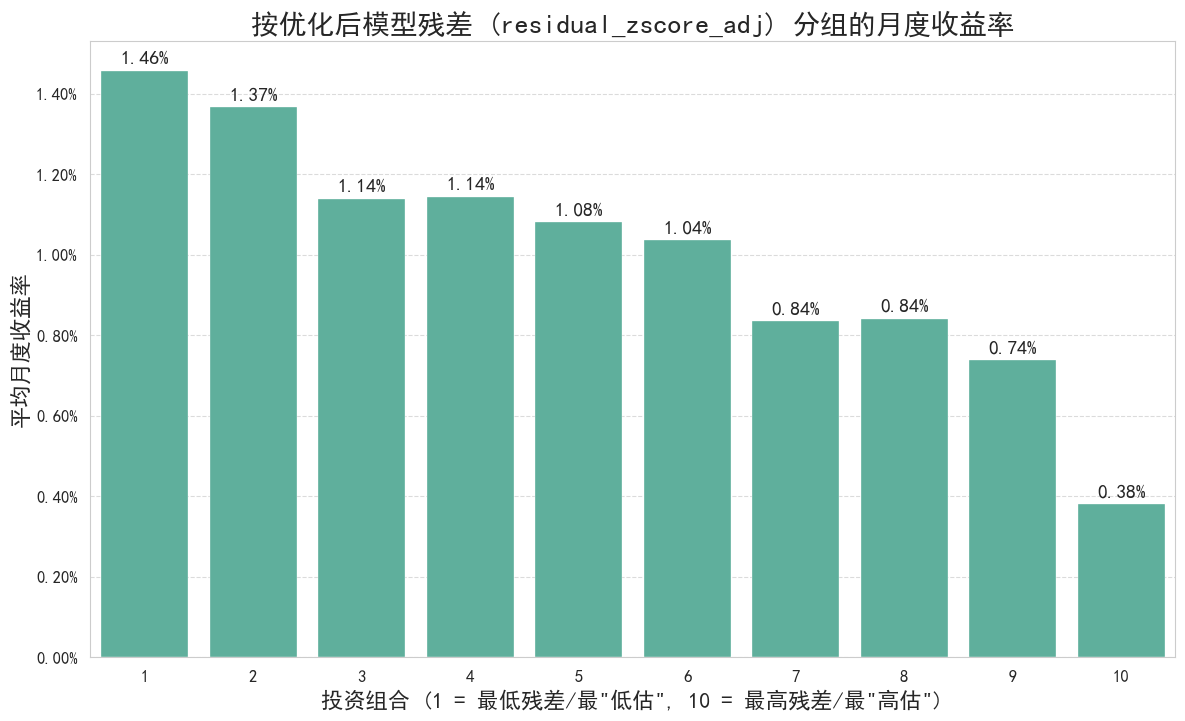

In [54]:
# 4.1残差收益分组
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

def set_academic_style():
    """设置图表的学术风格"""
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.style.use('seaborn-v0_8-paper')
    plt.rcParams['font.size'] = 18

set_academic_style()

# --- 1. 加载数据 ---

# 定义文件路径
# 这是我们刚刚计算出的、包含优化后模型残差的文件
RESIDUALS_FILE = Path('pbroe4.1Residuals.csv')
# 这是包含月度收益率数据的文件
RETURNS_FILE = Path('E:/PBROE/data/TRDNEW_Mnth.csv')

# 加载残差因子数据
try:
    df_factor = pd.read_csv(RESIDUALS_FILE)
    df_factor['stkcd'] = df_factor['stkcd'].astype(str).str.zfill(6)
    df_factor['调入日期'] = pd.to_datetime(df_factor['调入日期'])
    print(f"文件 '{RESIDUALS_FILE}' 加载成功，共 {len(df_factor)} 条记录。")
except FileNotFoundError:
    print(f"错误：未找到文件 '{RESIDUALS_FILE}'。请确保文件路径正确。")
    df_factor = pd.DataFrame()

# 加载收益率数据
try:
    df_returns = pd.read_csv(RETURNS_FILE, usecols=['Stkcd', 'Trdmnt', 'Mretwd'], encoding='utf-8-sig')
    df_returns.rename(columns={'Stkcd': 'stkcd', 'Trdmnt': 'return_month', 'Mretwd': 'next_month_return'}, inplace=True)
    df_returns['stkcd'] = df_returns['stkcd'].astype(str).str.zfill(6)
    # 将收益率月份转换为与“调入日期”匹配的格式
    df_returns['return_month'] = pd.to_datetime(df_returns['return_month'], format='%Y-%m')
    print(f"文件 '{RETURNS_FILE}' 加载成功，共 {len(df_returns)} 条收益率数据。")
except FileNotFoundError:
    print(f"错误：未找到文件 '{RETURNS_FILE}'。请确保文件路径正确。")
    df_returns = pd.DataFrame()


# --- 2. 数据预处理与合并 ---

if not df_factor.empty and not df_returns.empty:
    # 仅保留需要的列
    df_factor = df_factor[['调入日期', 'stkcd', 'residual_zscore_adj']].copy()

    # 将因子数据与收益率数据合并
    # 我们的残差是在t月计算的，用于t+1月的投资决策，因此“调入日期”应该与收益率的月份匹配
    merged_df = pd.merge(
        df_factor,
        df_returns,
        left_on=['stkcd', '调入日期'],
        right_on=['stkcd', 'return_month']
    )
    print(f"数据合并完成，共匹配到 {len(merged_df)} 条有效记录。")

    # --- 3. 投资组合分析 ---

    # 剔除缺失值
    analysis_df = merged_df.dropna(subset=['residual_zscore_adj', 'next_month_return']).copy()

    # 在每个月，将股票按 residual_zscore_adj 分成10组
    analysis_df['portfolio'] = analysis_df.groupby('调入日期')['residual_zscore_adj'].transform(
        lambda x: pd.qcut(x, 10, labels=False, duplicates='drop')
    )

    # 将分组标签从 0-9 调整为 1-10，更符合直觉
    analysis_df['portfolio'] = analysis_df['portfolio'] + 1

    # 计算每个月每个投资组合的等权平均收益率
    monthly_portfolio_returns = analysis_df.groupby(['调入日期', 'portfolio'])['next_month_return'].mean().reset_index()

    # --- 4. 计算并展示各组平均收益率 ---

    # 计算每个投资组合在整个时间跨度内的平均月度收益率
    average_returns = monthly_portfolio_returns.groupby('portfolio')['next_month_return'].mean()

    print("\n--- 各投资组合平均月度收益率 ---")
    print(average_returns)

    # --- 5. 可视化 ---

    print("\n正在绘制分组收益率柱状图...")

    plt.figure(figsize=(14, 8))

    # 使用您提供的学术配色
    bar_color = '#52BCA3' # 青绿

    ax = sns.barplot(x=average_returns.index, y=average_returns.values, color=bar_color)

    # 在每个柱子上显示数值
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=14)

    plt.title('按优化后模型残差 (residual_zscore_adj) 分组的月度收益率', fontsize=20, fontweight='bold')
    plt.xlabel('投资组合 (1 = 最低残差/最"低估", 10 = 最高残差/最"高估")', fontsize=16)
    plt.ylabel('平均月度收益率', fontsize=16)

    # 将y轴格式化为百分比
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.2%}'.format))

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

else:
    print("数据加载失败，无法进行分析。")



In [50]:
# 回测：pbroe4.1 (Badj回归残差策略)
import pandas as pd
import numpy as np
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')

# =================================================================== #
#                           【1. 配置区域】                           #
# =================================================================== #

# --- 文件路径配置 ---
# 【请修改】确保以下文件路径正确
DATA_PATH = Path("E:/PBROE/data")
CH4_PATH = Path("E:/PBROE/ch4")

# 包含所有股票残差数据的文件
# --- 核心修改：使用策略4.1的残差文件 ---
RESIDUAL_FILE = CH4_PATH / 'pbroe4.1Residuals.csv'
# 收益率和基准文件
RETURNS_FILE = DATA_PATH / 'TRDNEW_Mnth.csv'
BENCHMARK_FILE = DATA_PATH / 'benchmark_indices.csv'

# --- 策略参数配置 ---
# 选择残差最低的百分比作为持仓
RESIDUAL_QUANTILE = 0.1 # 选择残差最低的10%

# --- 回测参数配置 ---
BACKTEST_START_DATE = '2010-05-01' # 回测起始日期 (YYYY-MM-DD)
BACKTEST_END_DATE = '2025-04-30'   # 回测结束日期 (YYYY-MM-DD)
BENCHMARK_CODE = '000300'          # 业绩基准代码，沪深300
BENCHMARK_NAME = '沪深300'         # 基准名称，用于报告
RISK_FREE_RATE = 0.03              # 无风险利率，用于计算夏普比率

# =================================================================== #
#                  【2. 投资组合构建模块】                          #
# =================================================================== #

def build_portfolio_from_residuals(residual_file_path, quantile):
    """
    从残差数据文件中，根据指定的分位数阈值构建投资组合。
    """
    print("--- 步骤 1: 从残差数据构建投资组合 ---")
    try:
        df_all = pd.read_csv(residual_file_path)
        df_all['调入日期'] = pd.to_datetime(df_all['调入日期'])
        df_all['stkcd'] = df_all['stkcd'].astype(str).str.zfill(6)
        print(f"成功加载 {len(df_all)} 条残差数据。")
    except FileNotFoundError:
        print(f"错误: 找不到残差文件 {residual_file_path}。")
        return None

    # --- 核心修改：使用策略4.1的残差列名 ---
    residual_col = 'residual_zscore_adj'

    # 按每个调入日期分组，筛选出残差最低的股票
    portfolio_list = []
    for date, group in df_all.groupby('调入日期'):
        threshold = group[residual_col].quantile(quantile)
        selected_stocks = group[group[residual_col] <= threshold]
        portfolio_list.append(selected_stocks)

    strategy_df = pd.concat(portfolio_list)
    print(f"已根据残差最低 {quantile*100:.0f}% 的标准，构建了包含 {len(strategy_df)} 条持仓记录的投资组合。\n")
    return strategy_df


# =================================================================== #
#                  【3. 数据加载与预处理模块】                      #
# =================================================================== #

def load_and_preprocess_data(returns_path, benchmark_path, benchmark_code):
    """
    加载并预处理收益率和基准数据。
    """
    print("--- 步骤 2: 加载并预处理收益与基准数据 ---")
    try:
        try:
            returns_df = pd.read_csv(returns_path, encoding='utf-8-sig')
        except UnicodeDecodeError:
            returns_df = pd.read_csv(returns_path, encoding='gbk')
        all_benchmarks_df = pd.read_csv(benchmark_path)
        print("收益与基准数据文件加载成功。")

    except FileNotFoundError as e:
        print(f"错误: 无法找到数据文件 {e.filename}。")
        return None, None

    # --- 预处理股票收益文件 ---
    returns_df['Stkcd'] = returns_df['Stkcd'].astype(str).str.zfill(6)
    returns_df['Trdmnt'] = pd.to_datetime(returns_df['Trdmnt'])
    returns_df['Mretwd'] = pd.to_numeric(returns_df['Mretwd'], errors='coerce')
    returns_df['merge_key'] = returns_df['Trdmnt'].dt.strftime('%Y-%m')

    # --- 预处理基准文件 ---
    all_benchmarks_df['Indexcd'] = all_benchmarks_df['Indexcd'].astype(str).str.zfill(6)
    benchmark_df = all_benchmarks_df[all_benchmarks_df['Indexcd'] == benchmark_code].copy()
    if benchmark_df.empty:
        print(f"错误: 在基准文件中未能找到代码为 '{benchmark_code}' 的数据。")
        return None, None
    benchmark_df['date'] = pd.to_datetime(benchmark_df['Month'], format='%Y-%m')
    benchmark_df['merge_key'] = benchmark_df['date'].dt.strftime('%Y-%m')
    benchmark_df.rename(columns={'Idxrtn': 'benchmark_return'}, inplace=True)
    benchmark_df = benchmark_df[['merge_key', 'benchmark_return']]

    print("数据预处理完成。\n")
    return returns_df, benchmark_df

# =================================================================== #
#                       【4. 核心回测逻辑模块】                       #
# =================================================================== #

def run_backtest(strategy_df, returns_df, start_date_str, end_date_str):
    """
    执行回测循环，计算投资组合的月度收益率。
    """
    print("--- 步骤 3: 执行回测 ---")
    strategy_df.rename(columns={'调入日期': 'rebalance_date'}, inplace=True)
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    strategy_df = strategy_df[(strategy_df['rebalance_date'] >= start_date) & (strategy_df['rebalance_date'] <= end_date)]
    if strategy_df.empty:
        print("错误：在指定的回测期间内，没有找到任何有效的调仓数据。")
        return pd.DataFrame()
    rebalance_dates = sorted(strategy_df['rebalance_date'].unique())
    print(f"回测期间内的调仓日期数量: {len(rebalance_dates)}")
    monthly_returns_list = []

    for rebalance_date in rebalance_dates:
        current_portfolio = strategy_df[strategy_df['rebalance_date'] == rebalance_date]['stkcd'].tolist()
        month_key = rebalance_date.strftime('%Y-%m')
        month_returns_data = returns_df[
            (returns_df['merge_key'] == month_key) &
            (returns_df['Stkcd'].isin(current_portfolio))
        ]
        valid_returns = month_returns_data.dropna(subset=['Mretwd'])
        if not valid_returns.empty:
            portfolio_return = valid_returns['Mretwd'].mean()
            return_date = valid_returns['Trdmnt'].iloc[0]
            monthly_returns_list.append({
                'date': return_date,
                'portfolio_return': portfolio_return,
            })

    if not monthly_returns_list:
        print("错误：在指定的回测期间内，未能计算出任何月度收益率。")
        return pd.DataFrame()

    portfolio_returns_df = pd.DataFrame(monthly_returns_list).sort_values('date').reset_index(drop=True)
    print(f"回测循环完成，已生成 {len(portfolio_returns_df)} 条月度收益记录。\n")
    return portfolio_returns_df

# =================================================================== #
#                       【5. 年化换手率计算模块】                     #
# =================================================================== #

def calculate_annual_turnover(strategy_df, start_date_str, end_date_str):
    print("--- 步骤 4: 计算年化换手率 ---")
    strategy_df.rename(columns={'调入日期': 'rebalance_date'}, inplace=True, errors='ignore')

    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    strategy_df = strategy_df[(strategy_df['rebalance_date'] >= start_date) & (strategy_df['rebalance_date'] <= end_date)]
    rebalance_dates = sorted(strategy_df['rebalance_date'].unique())
    if len(rebalance_dates) < 2: return 0.0
    turnover_list = []
    for i in range(1, len(rebalance_dates)):
        prev_date, curr_date = rebalance_dates[i-1], rebalance_dates[i]
        prev_portfolio = set(strategy_df[strategy_df['rebalance_date'] == prev_date]['stkcd'])
        curr_portfolio = set(strategy_df[strategy_df['rebalance_date'] == curr_date]['stkcd'])
        if not prev_portfolio: continue
        stocks_sold = len(prev_portfolio - curr_portfolio)
        period_turnover = stocks_sold / len(prev_portfolio)
        turnover_list.append(period_turnover)
    if not turnover_list: return 0.0
    avg_period_turnover = np.mean(turnover_list)
    total_years = (rebalance_dates[-1] - rebalance_dates[0]).days / 365.25
    rebalances_per_year = len(turnover_list) / total_years if total_years > 0 else 0
    annual_turnover = avg_period_turnover * rebalances_per_year
    print(f"计算完成。预估年化换手率: {annual_turnover:.2%}\n")
    return annual_turnover

# =================================================================== #
#                       【6. 绩效计算与保存模块】                     #
# =================================================================== #

def calculate_performance_and_save(portfolio_returns_df, benchmark_df, annual_turnover, benchmark_name):
    print("--- 步骤 5: 计算绩效并保存结果 ---")
    portfolio_returns_df['merge_key'] = portfolio_returns_df['date'].dt.strftime('%Y-%m')
    merged_df = pd.merge(portfolio_returns_df, benchmark_df, on='merge_key', how='left')
    merged_df['benchmark_return'].fillna(0.0, inplace=True)
    merged_df.drop(columns=['merge_key'], inplace=True)
    total_months = len(merged_df)
    if total_months == 0: return None, None
    merged_df['cumulative_return'] = (1 + merged_df['portfolio_return']).cumprod()
    final_cumulative_return = merged_df['cumulative_return'].iloc[-1]
    annualized_return = final_cumulative_return ** (12 / total_months) - 1
    annualized_volatility = merged_df['portfolio_return'].std() * np.sqrt(12)
    sharpe_ratio = (annualized_return - RISK_FREE_RATE) / annualized_volatility if annualized_volatility != 0 else 0
    rolling_max = merged_df['cumulative_return'].expanding().max()
    drawdown = (merged_df['cumulative_return'] - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    annualized_benchmark_return = (1 + merged_df['benchmark_return']).prod() ** (12 / total_months) - 1
    excess_return = merged_df['portfolio_return'] - merged_df['benchmark_return']
    annualized_excess_return = annualized_return - annualized_benchmark_return
    tracking_error = excess_return.std() * np.sqrt(12)
    information_ratio = annualized_excess_return / tracking_error if tracking_error != 0 else 0
    metrics = {'年化收益率': annualized_return, '年化波动率': annualized_volatility, '夏普比率': sharpe_ratio, '最大回撤': max_drawdown, '年化换手率': annual_turnover, '年化超额收益率': annualized_excess_return, '信息比率': information_ratio, '跟踪误差': tracking_error, '基准年化收益率': annualized_benchmark_return, '累计收益率': final_cumulative_return - 1}

    # --- 核心修改：更新报告标题和文件名 ---
    print("\n--- PB-ROE 策略 (pbroe4.1 - 质量调整后模型) 绩效简报 ---")
    for key, value in metrics.items():
        print(f"{key+':':<12} {value:.2%}" if isinstance(value, float) and ('率' in key or '回撤' in key) else f"{key+':':<12} {value:.4f}")

    returns_filename = CH4_PATH / 'pbroe4.1_returns.csv'
    metrics_filename = CH4_PATH / 'pbroe4.1_performance.csv'

    merged_df.to_csv(returns_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"\n月度收益率详情已保存至: {returns_filename}")
    pd.DataFrame([metrics]).to_csv(metrics_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"绩效指标已保存至: {metrics_filename}\n")
    return merged_df, metrics

# =================================================================== #
#                          【7. 主函数执行】                          #
# =================================================================== #

def main():
    """
    主执行函数
    """
    try:
        # 1. 构建投资组合
        strategy_df = build_portfolio_from_residuals(RESIDUAL_FILE, RESIDUAL_QUANTILE)
        if strategy_df is None: return

        # 2. 加载回测所需数据
        returns_df, benchmark_df = load_and_preprocess_data(
            RETURNS_FILE, BENCHMARK_FILE, BENCHMARK_CODE
        )
        if returns_df is None: return

        # 3. 执行回测
        portfolio_returns_df = run_backtest(
            strategy_df.copy(), returns_df, BACKTEST_START_DATE, BACKTEST_END_DATE
        )
        if portfolio_returns_df.empty: return

        # 4. 计算换手率
        annual_turnover = calculate_annual_turnover(
            strategy_df.copy(), BACKTEST_START_DATE, BACKTEST_END_DATE
        )

        # 5. 计算并保存最终绩效
        final_df, metrics = calculate_performance_and_save(
            portfolio_returns_df, benchmark_df, annual_turnover, BENCHMARK_NAME
        )
        print("\n回测完成！")

    except Exception as e:
        print(f"\n执行过程中出现严重错误: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()


--- 步骤 1: 从残差数据构建投资组合 ---
成功加载 448197 条残差数据。
已根据残差最低 2% 的标准，构建了包含 9053 条持仓记录的投资组合。

--- 步骤 2: 加载并预处理收益与基准数据 ---
收益与基准数据文件加载成功。
数据预处理完成。

--- 步骤 3: 执行回测 ---
回测期间内的调仓日期数量: 180
回测循环完成，已生成 180 条月度收益记录。

--- 步骤 4: 计算年化换手率 ---
计算完成。预估年化换手率: 399.35%

--- 步骤 5: 计算绩效并保存结果 ---

--- PB-ROE 策略 (pbroe4.1 - 质量调整后模型) 绩效简报 ---
年化收益率:       12.74%
年化波动率:       26.01%
夏普比率:        37.45%
最大回撤:        -40.30%
年化换手率:       399.35%
年化超额收益率:     11.36%
信息比率:        65.83%
跟踪误差:        0.1725
基准年化收益率:     1.39%
累计收益率:       504.40%

月度收益率详情已保存至: E:\PBROE\ch4\pbroe4.1_returns.csv
绩效指标已保存至: E:\PBROE\ch4\pbroe4.1_performance.csv


回测完成！


文件 'E:\PBROE\ch3\pbroe3.1.csv' 加载成功，共 513741 条记录。
文件 'pbroe4.1Residuals.csv' 加载成功，共 448197 条记录。

找到 180 个共同的调仓日期进行比较。

两个策略最低残差组的平均重合度为: 35.84%

正在绘制重合度变化图...


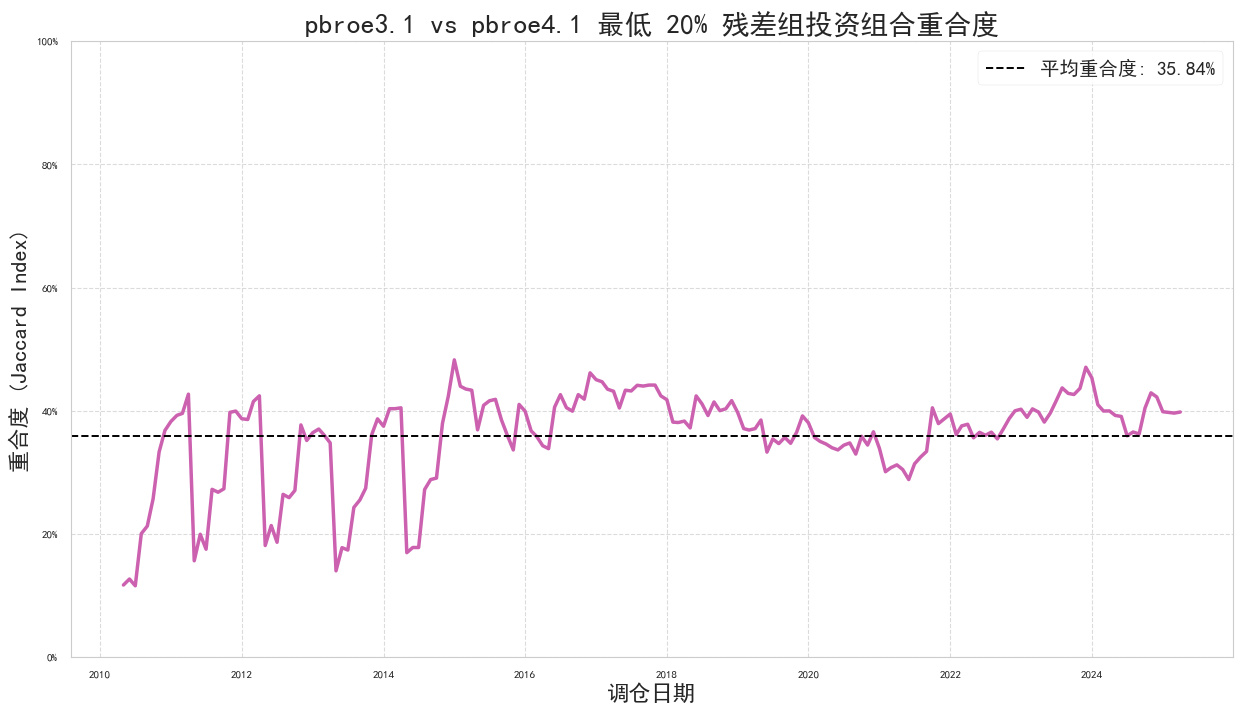

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

def set_academic_style():
    """设置图表的学术风格"""
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.style.use('seaborn-v0_8-paper')
    plt.rcParams['font.size'] = 18

set_academic_style()

# --- 1. 配置与加载数据 ---

# 定义文件路径
# 【请修改】确保以下文件路径正确
CH3_FILE = Path('E:/PBROE/ch3/pbroe3.1.csv')
CH4_FILE = Path('pbroe4.1Residuals.csv')

# 定义用于筛选最低残差组的分位数
RESIDUAL_QUANTILE = 0.2

# 加载策略3.1的数据
try:
    df_p3 = pd.read_csv(CH3_FILE)
    df_p3['stkcd'] = df_p3['stkcd'].astype(str).str.zfill(6)
    df_p3['调入日期'] = pd.to_datetime(df_p3['调入日期'])
    print(f"文件 '{CH3_FILE}' 加载成功，共 {len(df_p3)} 条记录。")
except FileNotFoundError:
    print(f"错误：未找到文件 '{CH3_FILE}'。")
    df_p3 = pd.DataFrame()

# 加载策略4.1的数据
try:
    df_p4 = pd.read_csv(CH4_FILE)
    df_p4['stkcd'] = df_p4['stkcd'].astype(str).str.zfill(6)
    df_p4['调入日期'] = pd.to_datetime(df_p4['调入日期'])
    print(f"文件 '{CH4_FILE}' 加载成功，共 {len(df_p4)} 条记录。")
except FileNotFoundError:
    print(f"错误：未找到文件 '{CH4_FILE}'。")
    df_p4 = pd.DataFrame()

# --- 2. 计算投资组合重合度 ---

if not df_p3.empty and not df_p4.empty:
    # 找到两个数据中共有的调仓日期
    common_dates = sorted(list(set(df_p3['调入日期']) & set(df_p4['调入日期'])))
    print(f"\n找到 {len(common_dates)} 个共同的调仓日期进行比较。")

    overlap_results = []

    for date in common_dates:
        # --- 获取策略3.1的最低残差组合 ---
        group3 = df_p3[df_p3['调入日期'] == date]
        if group3.empty: continue
        threshold3 = group3['residual_zscore'].quantile(RESIDUAL_QUANTILE)
        portfolio3 = set(group3[group3['residual_zscore'] <= threshold3]['stkcd'])

        # --- 获取策略4.1的最低残差组合 ---
        group4 = df_p4[df_p4['调入日期'] == date]
        if group4.empty: continue
        threshold4 = group4['residual_zscore_adj'].quantile(RESIDUAL_QUANTILE)
        portfolio4 = set(group4[group4['residual_zscore_adj'] <= threshold4]['stkcd'])

        # --- 计算重合度 (Jaccard Index) ---
        if not portfolio3 or not portfolio4:
            jaccard_index = 0
        else:
            intersection_size = len(portfolio3.intersection(portfolio4))
            union_size = len(portfolio3.union(portfolio4))
            jaccard_index = intersection_size / union_size if union_size > 0 else 0

        overlap_results.append({'date': date, 'overlap': jaccard_index})

    # 将结果转换为DataFrame
    overlap_df = pd.DataFrame(overlap_results)

    # --- 3. 可视化重合度 ---

    if not overlap_df.empty:
        # 计算平均重合度
        average_overlap = overlap_df['overlap'].mean()
        print(f"\n两个策略最低残差组的平均重合度为: {average_overlap:.2%}")

        print("\n正在绘制重合度变化图...")

        plt.figure(figsize=(15, 8))

        # 使用您提供的学术配色
        line_color = '#CC61B0' # 粉紫

        sns.lineplot(data=overlap_df, x='date', y='overlap', color=line_color, linewidth=2.5)

        # 绘制平均重合度线
        plt.axhline(y=average_overlap, color='black', linestyle='--',
                    label=f'平均重合度: {average_overlap:.2%}')

        plt.title(f'pbroe3.1 vs pbroe4.1 最低 {RESIDUAL_QUANTILE*100:.0f}% 残差组投资组合重合度', fontsize=20, fontweight='bold')
        plt.xlabel('调仓日期', fontsize=16)
        plt.ylabel('重合度 (Jaccard Index)', fontsize=16)

        # 将y轴格式化为百分比
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

        plt.legend(fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.ylim(0, max(1.0, overlap_df['overlap'].max() * 1.1)) # 设置y轴范围

        plt.show()
    else:
        print("\n未能计算出任何重合度数据。")

else:
    print("\n数据加载失败，无法进行分析。")



In [65]:
# 回测：pbroe4.2 (pbroe3.1 与 pbroe4.1 的交集策略)
import pandas as pd
import numpy as np
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')

# =================================================================== #
#                           【1. 配置区域】                           #
# =================================================================== #

# --- 文件路径配置 ---
# 【请修改】确保以下文件路径正确
DATA_PATH = Path("E:/PBROE/data")
CH3_PATH = Path("E:/PBROE/ch3")
CH4_PATH = Path("E:/PBROE/ch4")

# --- 核心修改：定义两个策略的残差文件 ---
RESIDUAL_FILE_P3 = CH3_PATH / 'pbroe3.1.csv'
RESIDUAL_FILE_P4 = CH4_PATH / 'pbroe4.1Residuals.csv'

# 收益率和基准文件
RETURNS_FILE = DATA_PATH / 'TRDNEW_Mnth.csv'
BENCHMARK_FILE = DATA_PATH / 'benchmark_indices.csv'

# --- 策略参数配置 ---
# 分别选择两个策略残差最低的百分比作为候选池
RESIDUAL_QUANTILE = 0.2 # 选择残差最低的10%

# --- 回测参数配置 ---
BACKTEST_START_DATE = '2010-05-01' # 回测起始日期 (YYYY-MM-DD)
BACKTEST_END_DATE = '2025-04-30'   # 回测结束日期 (YYYY-MM-DD)
BENCHMARK_CODE = '000300'          # 业绩基准代码，沪深300
BENCHMARK_NAME = '沪深300'         # 基准名称，用于报告
RISK_FREE_RATE = 0.03              # 无风险利率，用于计算夏普比率

# =================================================================== #
#                  【2. 投资组合构建模块】                          #
# =================================================================== #

def build_intersection_portfolio(file_p3, file_p4, quantile):
    """
    构建两个策略最低残差组的交集投资组合。
    """
    print("--- 步骤 1: 构建交集投资组合 ---")
    try:
        df_p3 = pd.read_csv(file_p3)
        df_p3['stkcd'] = df_p3['stkcd'].astype(str).str.zfill(6)
        df_p3['调入日期'] = pd.to_datetime(df_p3['调入日期'])

        df_p4 = pd.read_csv(file_p4)
        df_p4['stkcd'] = df_p4['stkcd'].astype(str).str.zfill(6)
        df_p4['调入日期'] = pd.to_datetime(df_p4['调入日期'])
        print("策略 pbroe3.1 和 pbroe4.1 的残差文件加载成功。")
    except FileNotFoundError as e:
        print(f"错误: 找不到残差文件 {e.filename}。")
        return None

    # 找到共有的调仓日期
    common_dates = sorted(list(set(df_p3['调入日期']) & set(df_p4['调入日期'])))
    print(f"找到 {len(common_dates)} 个共同的调仓日期进行比较。")

    intersection_portfolio_list = []

    for date in common_dates:
        # 获取策略3.1的最低残差组合
        group3 = df_p3[df_p3['调入日期'] == date]
        if group3.empty: continue
        threshold3 = group3['residual_zscore'].quantile(quantile)
        portfolio3_stocks = set(group3[group3['residual_zscore'] <= threshold3]['stkcd'])

        # 获取策略4.1的最低残差组合
        group4 = df_p4[df_p4['调入日期'] == date]
        if group4.empty: continue
        threshold4 = group4['residual_zscore_adj'].quantile(quantile)
        portfolio4_stocks = set(group4[group4['residual_zscore_adj'] <= threshold4]['stkcd'])

        # 取交集
        intersection_stocks = list(portfolio3_stocks.intersection(portfolio4_stocks))

        if intersection_stocks:
            # 将交集股票构造成策略DataFrame的格式
            temp_df = pd.DataFrame({
                '调入日期': date,
                'stkcd': intersection_stocks
            })
            intersection_portfolio_list.append(temp_df)

    if not intersection_portfolio_list:
        print("错误：未能构建任何有效的交集投资组合。")
        return None

    strategy_df = pd.concat(intersection_portfolio_list)
    print(f"已成功构建交集投资组合，共包含 {len(strategy_df)} 条持仓记录。\n")
    return strategy_df


# =================================================================== #
#                  【3. 数据加载与预处理模块】                      #
# =================================================================== #

def load_and_preprocess_data(returns_path, benchmark_path, benchmark_code):
    """
    加载并预处理收益率和基准数据。
    """
    print("--- 步骤 2: 加载并预处理收益与基准数据 ---")
    try:
        try:
            returns_df = pd.read_csv(returns_path, encoding='utf-8-sig')
        except UnicodeDecodeError:
            returns_df = pd.read_csv(returns_path, encoding='gbk')
        all_benchmarks_df = pd.read_csv(benchmark_path)
        print("收益与基准数据文件加载成功。")

    except FileNotFoundError as e:
        print(f"错误: 无法找到数据文件 {e.filename}。")
        return None, None

    # --- 预处理股票收益文件 ---
    returns_df['Stkcd'] = returns_df['Stkcd'].astype(str).str.zfill(6)
    returns_df['Trdmnt'] = pd.to_datetime(returns_df['Trdmnt'])
    returns_df['Mretwd'] = pd.to_numeric(returns_df['Mretwd'], errors='coerce')
    returns_df['merge_key'] = returns_df['Trdmnt'].dt.strftime('%Y-%m')

    # --- 预处理基准文件 ---
    all_benchmarks_df['Indexcd'] = all_benchmarks_df['Indexcd'].astype(str).str.zfill(6)
    benchmark_df = all_benchmarks_df[all_benchmarks_df['Indexcd'] == benchmark_code].copy()
    if benchmark_df.empty:
        print(f"错误: 在基准文件中未能找到代码为 '{benchmark_code}' 的数据。")
        return None, None
    benchmark_df['date'] = pd.to_datetime(benchmark_df['Month'], format='%Y-%m')
    benchmark_df['merge_key'] = benchmark_df['date'].dt.strftime('%Y-%m')
    benchmark_df.rename(columns={'Idxrtn': 'benchmark_return'}, inplace=True)
    benchmark_df = benchmark_df[['merge_key', 'benchmark_return']]

    print("数据预处理完成。\n")
    return returns_df, benchmark_df

# =================================================================== #
#                       【4. 核心回测逻辑模块】                       #
# =================================================================== #

def run_backtest(strategy_df, returns_df, start_date_str, end_date_str):
    """
    执行回测循环，计算投资组合的月度收益率。
    """
    print("--- 步骤 3: 执行回测 ---")
    strategy_df.rename(columns={'调入日期': 'rebalance_date'}, inplace=True)
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    strategy_df = strategy_df[(strategy_df['rebalance_date'] >= start_date) & (strategy_df['rebalance_date'] <= end_date)]
    if strategy_df.empty:
        print("错误：在指定的回测期间内，没有找到任何有效的调仓数据。")
        return pd.DataFrame()
    rebalance_dates = sorted(strategy_df['rebalance_date'].unique())
    print(f"回测期间内的调仓日期数量: {len(rebalance_dates)}")
    monthly_returns_list = []

    for rebalance_date in rebalance_dates:
        current_portfolio = strategy_df[strategy_df['rebalance_date'] == rebalance_date]['stkcd'].tolist()
        month_key = rebalance_date.strftime('%Y-%m')
        month_returns_data = returns_df[
            (returns_df['merge_key'] == month_key) &
            (returns_df['Stkcd'].isin(current_portfolio))
        ]
        valid_returns = month_returns_data.dropna(subset=['Mretwd'])
        if not valid_returns.empty:
            portfolio_return = valid_returns['Mretwd'].mean()
            return_date = valid_returns['Trdmnt'].iloc[0]
            monthly_returns_list.append({
                'date': return_date,
                'portfolio_return': portfolio_return,
            })

    if not monthly_returns_list:
        print("错误：在指定的回测期间内，未能计算出任何月度收益率。")
        return pd.DataFrame()

    portfolio_returns_df = pd.DataFrame(monthly_returns_list).sort_values('date').reset_index(drop=True)
    print(f"回测循环完成，已生成 {len(portfolio_returns_df)} 条月度收益记录。\n")
    return portfolio_returns_df

# =================================================================== #
#                       【5. 年化换手率计算模块】                     #
# =================================================================== #

def calculate_annual_turnover(strategy_df, start_date_str, end_date_str):
    print("--- 步骤 4: 计算年化换手率 ---")
    strategy_df.rename(columns={'调入日期': 'rebalance_date'}, inplace=True, errors='ignore')

    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    strategy_df = strategy_df[(strategy_df['rebalance_date'] >= start_date) & (strategy_df['rebalance_date'] <= end_date)]
    rebalance_dates = sorted(strategy_df['rebalance_date'].unique())
    if len(rebalance_dates) < 2: return 0.0
    turnover_list = []
    for i in range(1, len(rebalance_dates)):
        prev_date, curr_date = rebalance_dates[i-1], rebalance_dates[i]
        prev_portfolio = set(strategy_df[strategy_df['rebalance_date'] == prev_date]['stkcd'])
        curr_portfolio = set(strategy_df[strategy_df['rebalance_date'] == curr_date]['stkcd'])
        if not prev_portfolio: continue
        stocks_sold = len(prev_portfolio - curr_portfolio)
        period_turnover = stocks_sold / len(prev_portfolio)
        turnover_list.append(period_turnover)
    if not turnover_list: return 0.0
    avg_period_turnover = np.mean(turnover_list)
    total_years = (rebalance_dates[-1] - rebalance_dates[0]).days / 365.25
    rebalances_per_year = len(turnover_list) / total_years if total_years > 0 else 0
    annual_turnover = avg_period_turnover * rebalances_per_year
    print(f"计算完成。预估年化换手率: {annual_turnover:.2%}\n")
    return annual_turnover

# =================================================================== #
#                       【6. 绩效计算与保存模块】                     #
# =================================================================== #

def calculate_performance_and_save(portfolio_returns_df, benchmark_df, annual_turnover, benchmark_name):
    print("--- 步骤 5: 计算绩效并保存结果 ---")
    portfolio_returns_df['merge_key'] = portfolio_returns_df['date'].dt.strftime('%Y-%m')
    merged_df = pd.merge(portfolio_returns_df, benchmark_df, on='merge_key', how='left')
    merged_df['benchmark_return'].fillna(0.0, inplace=True)
    merged_df.drop(columns=['merge_key'], inplace=True)
    total_months = len(merged_df)
    if total_months == 0: return None, None
    merged_df['cumulative_return'] = (1 + merged_df['portfolio_return']).cumprod()
    final_cumulative_return = merged_df['cumulative_return'].iloc[-1]
    annualized_return = final_cumulative_return ** (12 / total_months) - 1
    annualized_volatility = merged_df['portfolio_return'].std() * np.sqrt(12)
    sharpe_ratio = (annualized_return - RISK_FREE_RATE) / annualized_volatility if annualized_volatility != 0 else 0
    rolling_max = merged_df['cumulative_return'].expanding().max()
    drawdown = (merged_df['cumulative_return'] - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    annualized_benchmark_return = (1 + merged_df['benchmark_return']).prod() ** (12 / total_months) - 1
    excess_return = merged_df['portfolio_return'] - merged_df['benchmark_return']
    annualized_excess_return = annualized_return - annualized_benchmark_return
    tracking_error = excess_return.std() * np.sqrt(12)
    information_ratio = annualized_excess_return / tracking_error if tracking_error != 0 else 0
    metrics = {'年化收益率': annualized_return, '年化波动率': annualized_volatility, '夏普比率': sharpe_ratio, '最大回撤': max_drawdown, '年化换手率': annual_turnover, '年化超额收益率': annualized_excess_return, '信息比率': information_ratio, '跟踪误差': tracking_error, '基准年化收益率': annualized_benchmark_return, '累计收益率': final_cumulative_return - 1}

    # --- 核心修改：更新报告标题和文件名 ---
    print("\n--- PB-ROE 策略 (pbroe4.2 - 交集模型) 绩效简报 ---")
    for key, value in metrics.items():
        print(f"{key+':':<12} {value:.2%}" if isinstance(value, float) and ('率' in key or '回撤' in key) else f"{key+':':<12} {value:.4f}")

    returns_filename = CH4_PATH / 'pbroe4.2_returns.csv'
    metrics_filename = CH4_PATH / 'pbroe4.2_performance.csv'

    merged_df.to_csv(returns_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"\n月度收益率详情已保存至: {returns_filename}")
    pd.DataFrame([metrics]).to_csv(metrics_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"绩效指标已保存至: {metrics_filename}\n")
    return merged_df, metrics

# =================================================================== #
#                          【7. 主函数执行】                          #
# =================================================================== #

def main():
    """
    主执行函数
    """
    try:
        # 1. 构建投资组合
        strategy_df = build_intersection_portfolio(RESIDUAL_FILE_P3, RESIDUAL_FILE_P4, RESIDUAL_QUANTILE)
        if strategy_df is None: return

        # 2. 加载回测所需数据
        returns_df, benchmark_df = load_and_preprocess_data(
            RETURNS_FILE, BENCHMARK_FILE, BENCHMARK_CODE
        )
        if returns_df is None: return

        # 3. 执行回测
        portfolio_returns_df = run_backtest(
            strategy_df.copy(), returns_df, BACKTEST_START_DATE, BACKTEST_END_DATE
        )
        if portfolio_returns_df.empty: return

        # 4. 计算换手率
        annual_turnover = calculate_annual_turnover(
            strategy_df.copy(), BACKTEST_START_DATE, BACKTEST_END_DATE
        )

        # 5. 计算并保存最终绩效
        final_df, metrics = calculate_performance_and_save(
            portfolio_returns_df, benchmark_df, annual_turnover, BENCHMARK_NAME
        )
        print("\n回测完成！")

    except Exception as e:
        print(f"\n执行过程中出现严重错误: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()


--- 步骤 1: 构建交集投资组合 ---
策略 pbroe3.1 和 pbroe4.1 的残差文件加载成功。
找到 180 个共同的调仓日期进行比较。
已成功构建交集投资组合，共包含 50885 条持仓记录。

--- 步骤 2: 加载并预处理收益与基准数据 ---
收益与基准数据文件加载成功。
数据预处理完成。

--- 步骤 3: 执行回测 ---
回测期间内的调仓日期数量: 180
回测循环完成，已生成 180 条月度收益记录。

--- 步骤 4: 计算年化换手率 ---
计算完成。预估年化换手率: 238.75%

--- 步骤 5: 计算绩效并保存结果 ---

--- PB-ROE 策略 (pbroe4.2 - 交集模型) 绩效简报 ---
年化收益率:       16.13%
年化波动率:       26.23%
夏普比率:        50.05%
最大回撤:        -33.96%
年化换手率:       238.75%
年化超额收益率:     14.74%
信息比率:        87.64%
跟踪误差:        0.1682
基准年化收益率:     1.39%
累计收益率:       842.09%

月度收益率详情已保存至: E:\PBROE\ch4\pbroe4.2_returns.csv
绩效指标已保存至: E:\PBROE\ch4\pbroe4.2_performance.csv


回测完成！
